# Day 2 of IAU MESA hackathon: Rotating stars 

Summer 2024

This notebook contains the solutions to the plotting excersizes of day 2 of the MESA hackathon

In [28]:
# Imports
import numpy as np                  # Import numpy for numerical operations
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import mesa_reader as mr            # Import mesa_reader to read in history/profile files

from astropy import constants as const
import astropy.units as u


In [29]:

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# Turn off natural name warning for panda tables (this is due to '@' and '>' in the COMPAS column names)
import warnings
from tables import NaturalNameWarning
warnings.filterwarnings('ignore', category=NaturalNameWarning)


In [30]:
# Make a MesaData object for the history file
histdata = mr.MesaData('./rotating_star_proj/LOGS/history.data')

# print what information is available in the history file
print(histdata.bulk_names)

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alpha', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_entropy', 'center_omega', 'center_omega_div_omega_crit', 'center_h1', 'center_he4', 'center_c12

# Making a pretty HR diagram for information purposes

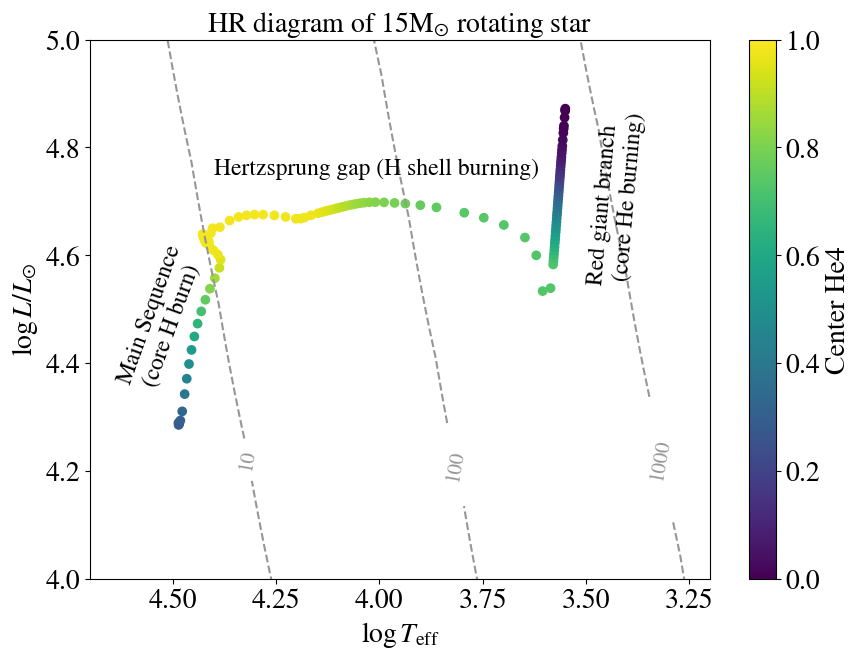

In [153]:
# Relation between L, Teff and R (Stefan-Boltzmann law)
def Radius(Teff, L):
    Teff = Teff*u.K
    L = (L*u.Lsun).to(u.W) #change from Lsun to W
    R = (L/(4*np.pi * const.sigma_sb*Teff**4))**0.5
    return R.to(u.Rsun).value

# Start plotting
fig, ax = plt.subplots(figsize = (10,7))

plt.title('HR diagram of $15 \mathrm{M_{\odot}} $ rotating star', size = 20) 
plt.scatter(histdata.log_Teff, histdata.log_L, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)
plt.colorbar(label = 'Center He4')

# # plot contour lines of constant radius using SB law 
Teffs = np.linspace(1.5, 8, 100)
Ls = np.linspace(2.0, 6.0, 100)
Teffs_grid, Ls_grid = np.meshgrid(Teffs, Ls)# Create a grid 
Radius_grid = Radius(10**Teffs_grid, 10**Ls_grid) # Apply Radius to each pair of Teffs and Ls values
CS = plt.contour(Teffs_grid, Ls_grid, Radius_grid, levels = [1, 10, 100, 1e3, 1e4],
            colors='#969696', linestyles='dashed')
plt.clabel(CS, inline=1, inline_spacing = -5, fontsize=15,
           manual = [(4.5, 4.2), (3.9, 4.2), (3.5, 4.2), (2.5, 4.2), (1.5, 4.1)] )

# Annotate some evolutionary phases
plt.text(4.64, 4.35, 'Main Sequence \n (core H burn)', rotation = 70, fontsize = 17)
plt.text(4.4, 4.75, 'Hertzsprung gap (H shell burning)', fontsize = 17)
plt.text(3.5, 4.55, 'Red giant branch \n (core He burning)', rotation = 85, fontsize = 17)

# Flip the x-axis
plt.xlim(3.2,4.7)
plt.ylim(4,5)
plt.gca().invert_xaxis()
plt.xlabel('$\log T_{\mathrm{eff}}$')
plt.ylabel('$\log L/L_{\odot}$')
plt.savefig('HR_diagram.png', bbox_inches = 'tight')
plt.show()

# Task R.3 
## Surface rotation

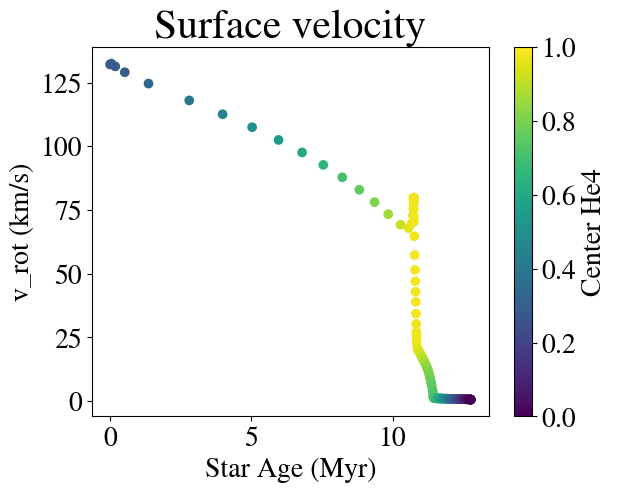

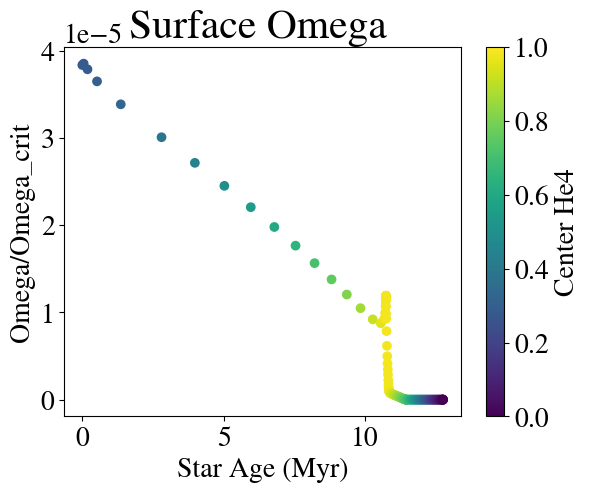

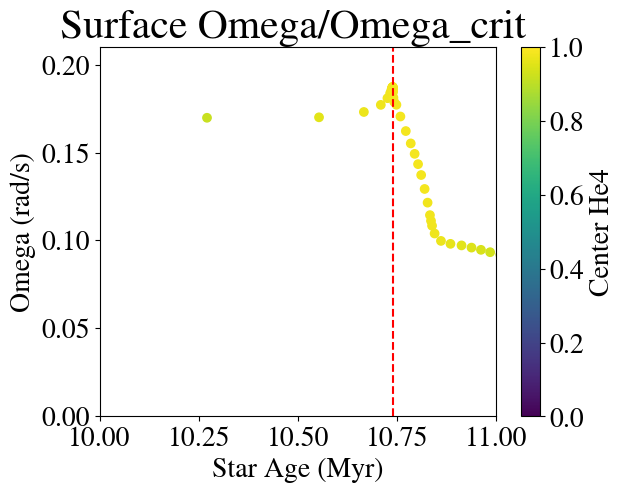

In [172]:
# # # # # # # # # # # # # # # 
plt.title('Surface velocity') 
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_v_rot, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('v_rot (km/s)')
plt.show()

# # # # # # # # # # # # # # # 
plt.title('Surface Omega ')
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_omega, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Omega/Omega_crit')
plt.show()


# # # # # # # # # # # # # # # 
plt.title('Surface Omega/Omega_crit ')
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_omega/histdata.surf_avg_omega_crit, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.axvline(x =histdata.star_age[histdata.model_number ==150]/1e6, color = 'red', linestyle = 'dashed')
plt.xlim(10,11)
plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Omega (rad/s)')
plt.show()



# Loading in the profiles

In [176]:
# What model has 
print(histdata.center_he4[histdata.model_number == 598])

logs = mr.MesaLogDir('rotating_star_proj/LOGS')

profile_ZAMS        = logs.profile_data(model_number=1)
profile_TAMS        = logs.profile_data(model_number=150)
profile_Heexhaust   = logs.profile_data()# Loads last profile


[4.59577528e-07]


In [ ]:
profile_ZAMS